In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time 
from numpy.random import seed 
from numpy.random import randint 

In [2]:
def ones_averaging(img,k):
    kernel=np.ones((k,k))
    out_img=np.zeros_like(img)
    row,col=img.shape
    img_pad= np.zeros((row+ k-1,col + k-1))
    upper_zero_cnt=(k-1)/2
    u=int(upper_zero_cnt)
    img_pad[u:-u, u:-u] = img
    for i in range(row):
        for j in range(col):
            out_img[i,j]= (kernel*img_pad[i:i+k,j:j+k]).sum()
    return out_img/(k*k)

In [3]:
def optim_avg(img,k):
    kernel=np.ones((k,k))
    out_img=np.zeros_like(img)
    row,col=img.shape
    img_pad= np.zeros((row+ k-1,col + k-1))
    upper_zero_cnt=(k-1)/2
    u=int(upper_zero_cnt)
    img_pad[u:-u, u:-u] = img
    cum_col=np.zeros_like(img_pad)
    for i in range(row):
        for j in range(col+k-1):
            if(i==0):
                cum_col[i,j]=img_pad[i:i+k,j].sum()
            else:
                cum_col[i,j]+=cum_col[i-1,j]+(img_pad[i+k-1,j]-img_pad[i-1,j])
    for i in range(row):
        for j in range(col):
            if(j==0):
                out_img[i,j]=cum_col[i,j:j+k].sum()
            else:
                out_img[i,j]+=out_img[i,j-1]+cum_col[i,j+k-1]-cum_col[i,j-1]
    return out_img/(k*k)

In [4]:
# img64=cv.imread('../images/Img64.jpg',0)
# plt.imshow(img64)
# plt.show()
# img64.shape
# plt.imshow(ones_averaging(img64,3))
# plt.show()
# plt.imshow(optim_avg(img64,3))
# plt.show()

In [5]:
from time import time
# k = [3,5,7,9]
k=[25,57,63,111]
dim = [64,128,256]
out = np.zeros((3,4))
out1 = np.zeros((3,4))
m = 0
n = 0
for i in dim:
#     img=np.ones((i,i))
    img = np.random.randint(low=0, high=255, size=(i,i))
    for j in k:
        a = time()
        temp = ones_averaging(img,j)
        b = time()
        out[m,n] = b-a
        c=time()
        temp1=optim_avg(img,j)
        d=time()
        out1[m,n]=d-c
        n+=1
    n = 0
    m+=1

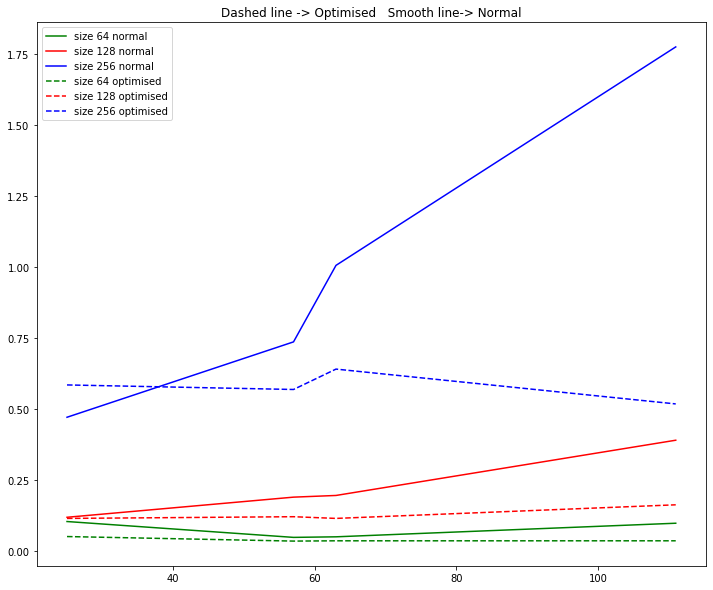

In [6]:
plt.figure(figsize=(12,10))

plt.plot(k,out[0,:],color='green',label = "size "+str(dim[0])+" normal")
plt.plot(k,out[1,:],color='red',label = "size "+str(dim[1])+" normal")
plt.plot(k,out[2,:],color='blue',label = "size "+str(dim[2])+" normal")
# plt.plot(k,out[3,:],color='black',label = "size "+str(dim[3])+" normal")

plt.plot(k,out1[0,:],color='green',linestyle='dashed',label = "size "+str(dim[0])+" optimised")
plt.plot(k,out1[1,:],color='red',linestyle='dashed',label = "size "+str(dim[1])+" optimised")
plt.plot(k,out1[2,:],color='blue',linestyle='dashed',label = "size "+str(dim[2])+" optimised")
# plt.plot(k,out1[3,:],color='black',linestyle='dashed',label = "size "+str(dim[3])+" optimised")

plt.title("Dashed line -> Optimised   Smooth line-> Normal")
plt.legend()
plt.show()

In [7]:
def median_filter(img,k):
    out_img=np.zeros_like(img)
    row,col=img.shape
    img_pad= np.zeros((row+ k-1,col + k-1))
    upper_zero_cnt=(k-1)/2
    u=int(upper_zero_cnt)
    img_pad[u:-u, u:-u] = img
    for i in range(row):
        for j in range(col):
            out_img[i,j]= np.median(img_pad[i:i+k,j:j+k])
    return out_img

In [8]:
def optim_median_filter(img,k):
    out_img=np.zeros_like(img)
    row,col=img.shape
    img_pad= np.zeros((row+ k-1,col + k-1))
    upper_zero_cnt=(k-1)/2
    u=int(upper_zero_cnt)
    img_pad[u:-u, u:-u] = img
    pos=(k**2-1)//2
    pos=pos+1
    his=np.arange(257)
    cum_his=np.arange(257)
    for i in range(row):
        for j in range(col):
            if(j==0):
                his=np.histogram(img_pad[i:i+k,j:j+k],bins=np.arange(257))[0]
                cum_his=np.cumsum(his)
                out_img[i,j]=(np.where(cum_his>=pos)[0][0])
            else:
                bef_vals = np.ravel(img_pad[i:i+k,j-1]).astype('int64')
                aft_vals = np.ravel(img_pad[i:i+k,j+k-1]).astype('int64')
                for x in range(len(bef_vals)):
                    his[bef_vals[x]]-=1
                    his[aft_vals[x]]+=1
                cum_his=np.cumsum(his)
#                 bef_his=np.histogram(img_pad[i:i+k,j-1],bins=np.arange(257))[0]
#                 aft_his=np.histogram(img_pad[i:i+k,j+k-1],bins=np.arange(257))[0]
#                 cum_his=cum_his+np.cumsum(aft_his)-np.cumsum(bef_his)
                out_img[i,j]=(np.where(cum_his>=pos)[0][0])
    return out_img

In [9]:
from time import time
k = [3,5,7,9]
# k=[9,27,45,63]
dim = [64,128,256]
out = np.zeros((3,4))
out1 = np.zeros((3,4))
m = 0
n = 0
for i in dim:
    img = np.random.randint(low=0, high=255, size=(i,i))
    for j in k:
        a = time()
        temp = median_filter(img,j)
        b = time()
        out[m,n] = b-a
        c=time()
        temp1=optim_median_filter(img,j)
        d=time()
        out1[m,n]=d-c
        n+=1
    n = 0
    m+=1

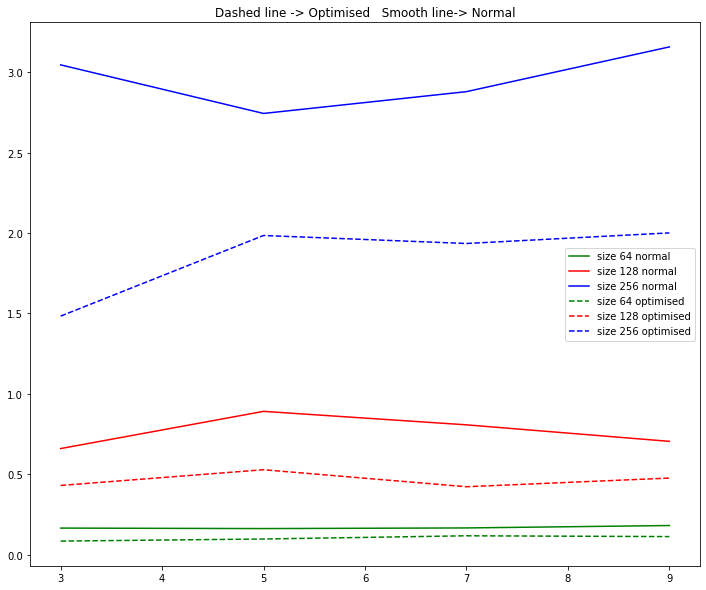

In [10]:
plt.figure(figsize=(12,10))
plt.plot(k,out[0,:],color='green',label = "size "+str(dim[0])+" normal")
plt.plot(k,out[1,:],color='red',label = "size "+str(dim[1])+" normal")
plt.plot(k,out[2,:],color='blue',label = "size "+str(dim[2])+" normal")
# plt.plot(k,out[3,:],color='black',label = "size "+str(dim[3])+" normal")
plt.plot(k,out1[0,:],color='green',linestyle='dashed',label = "size "+str(dim[0])+" optimised")
plt.plot(k,out1[1,:],color='red',linestyle='dashed',label = "size "+str(dim[1])+" optimised")
plt.plot(k,out1[2,:],color='blue',linestyle='dashed',label = "size "+str(dim[2])+" optimised")
# plt.plot(k,out1[3,:],color='black',linestyle='dashed',label = "size "+str(dim[3])+" optimised")
plt.title("Dashed line -> Optimised   Smooth line-> Normal")
plt.legend()
plt.show()

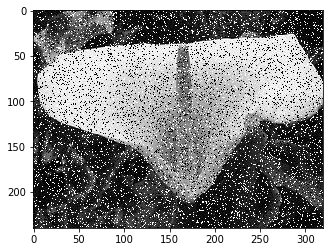

In [11]:
noise_img=cv.imread('../images/Noisy.jpg',0)
plt.imshow(noise_img,cmap="gray")
plt.show()

In [12]:
r1 = median_filter(noise_img,3)

In [13]:
r2  = optim_median_filter(noise_img,3)

Text(0.5, 1.0, 'Optimized Median Filter Output')

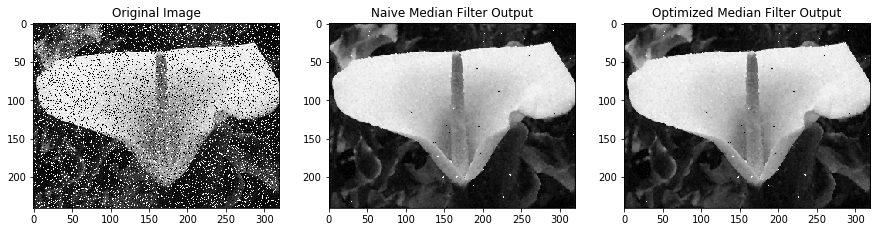

In [14]:
f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(noise_img,cmap="gray")
axarr[1].imshow(r1,cmap="gray")
axarr[2].imshow(r2,cmap="gray")
axarr[0].set_title("Original Image")
axarr[1].set_title("Naive Median Filter Output")
axarr[2].set_title("Optimized Median Filter Output")

### Method used for Denoising image :-

>Here median filtering is employed because if image is observed closely, we can see both salt and pepper noise in the image and the best solution for that which is computationally cheap is median filtering.
